In [ ]:
'''
【课程3.6】  基本图表绘制 plt.plot()

图表类别：线形图、柱状图、密度图，以横纵坐标两个维度为主
同时可延展出多种其他图表样式

plt.plot(kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, 
style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, 
rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds)
 
'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

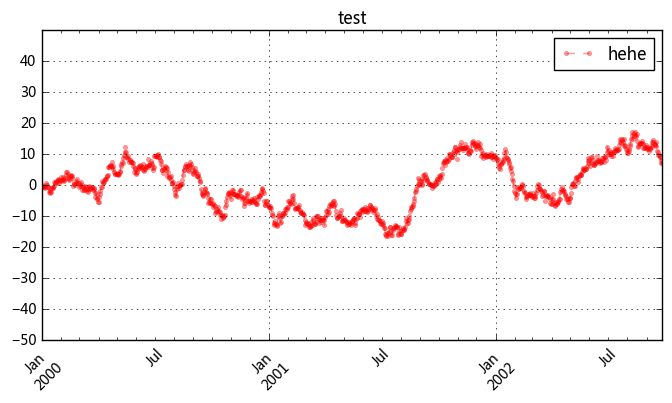

In [2]:
# Series直接生成图表

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot(kind='line',
       label = 'hehe',
       style = '--g.',
       color = 'red',
       alpha = 0.4,
       use_index = True,
       rot = 45,
       grid = True,
       ylim = [-50,50],
       yticks = list(range(-50,50,10)),
       figsize = (8,4),
       title = 'test',
       legend = True)
#plt.grid(True, linestyle = "--",color = "gray", linewidth = "0.5",axis = 'x')  # 网格
plt.legend()
# Series.plot()：series的index为横坐标，value为纵坐标
# kind → line,bar,barh...（折线图，柱状图，柱状图-横...）
# label → 图例标签，Dataframe格式以列名为label
# style → 风格字符串，这里包括了linestyle（-），marker（.），color（g）
# color → 颜色，有color指定时候，以color颜色为准
# alpha → 透明度，0-1
# use_index → 将索引用为刻度标签，默认为True
# rot → 旋转刻度标签，0-360
# grid → 显示网格，一般直接用plt.grid
# xlim,ylim → x,y轴界限
# xticks,yticks → x,y轴刻度值
# figsize → 图像大小
# title → 图名
# legend → 是否显示图例，一般直接用plt.legend()
# 也可以 → plt.plot()

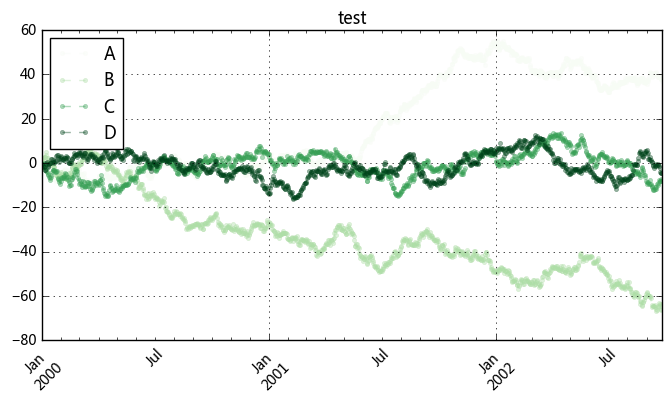

In [3]:
# Dataframe直接生成图表

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(kind='line',
       style = '--.',
       alpha = 0.4,
       use_index = True,
       rot = 45,
       grid = True,
       figsize = (8,4),
       title = 'test',
       legend = True,
       subplots = False,
       colormap = 'Greens')
# subplots → 是否将各个列绘制到不同图表，默认False
# 也可以 → plt.plot(df)

In [4]:
'''
【课程3.7】  柱状图、堆叠图、面积图、填图

plt.plot(kind='bar/barh') , plt.bar()
 
'''

"\n【课程3.7】  柱状图、堆叠图、面积图、填图\n\nplt.plot(kind='bar/barh') , plt.bar()\n \n"

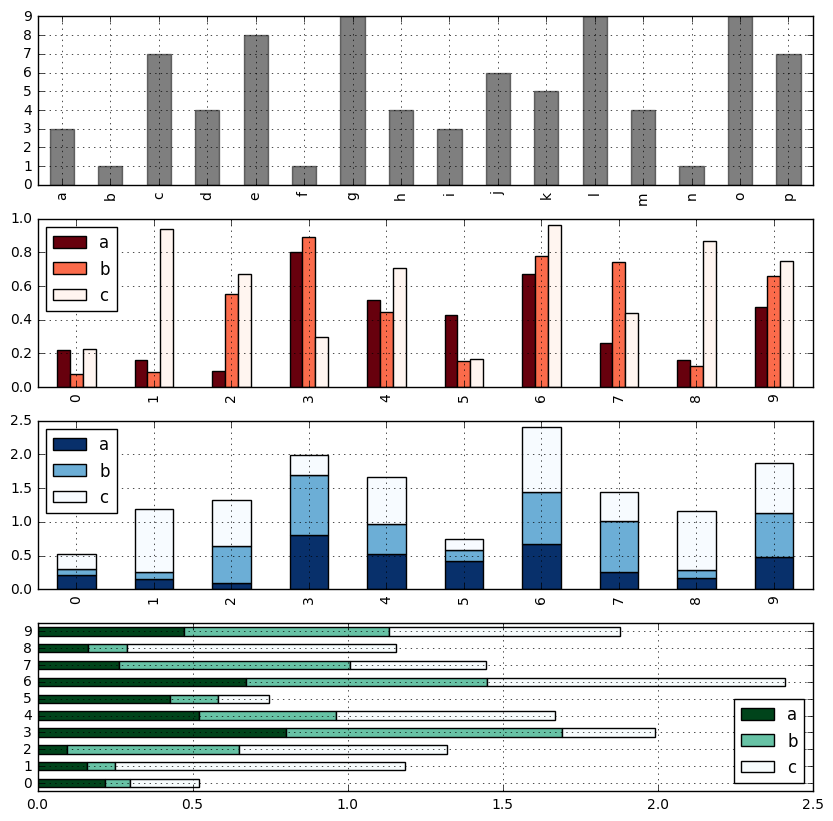

In [4]:
# 柱状图与堆叠图

fig,axes = plt.subplots(4,1,figsize = (10,10))
s = pd.Series(np.random.randint(0,10,16),index = list('abcdefghijklmnop'))  
df = pd.DataFrame(np.random.rand(10,3), columns=['a','b','c'])

s.plot(kind='bar',color = 'k',grid = True,alpha = 0.5,ax = axes[0])  # ax参数 → 选择第几个子图
# 单系列柱状图方法一：plt.plot(kind='bar/barh')

df = pd.DataFrame(np.random.rand(10,3), columns=['a','b','c'])
df.plot(kind='bar',ax = axes[1],grid = True,colormap='Reds_r')
# 多系列柱状图

df.plot(kind='bar',ax = axes[2],grid = True,colormap='Blues_r',stacked=True) 
# 多系列堆叠图
# stacked → 堆叠

df.plot.barh(ax = axes[3],grid = True,stacked=True,colormap = 'BuGn_r')
# 新版本plt.plot.<kind>

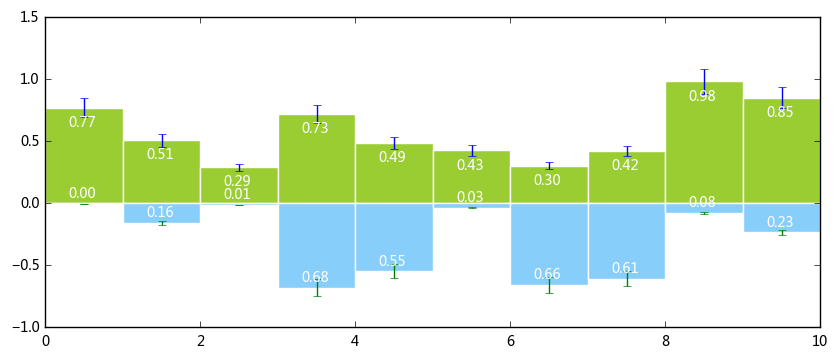

In [5]:
# 柱状图 plt.bar()

plt.figure(figsize=(10,4))
x = np.arange(10)
y1 = np.random.rand(10)
y2 = -np.random.rand(10)

plt.bar(x,y1,width = 1,facecolor = 'yellowgreen',edgecolor = 'white',yerr = y1*0.1)
plt.bar(x,y2,width = 1,facecolor = 'lightskyblue',edgecolor = 'white',yerr = y2*0.1)
# x,y参数：x，y值
# width：宽度比例
# facecolor柱状图里填充的颜色、edgecolor是边框的颜色
# left-每个柱x轴左边界,bottom-每个柱y轴下边界 → bottom扩展即可化为甘特图 Gantt Chart
# align：决定整个bar图分布，默认left表示默认从左边界开始绘制,center会将图绘制在中间位置
# xerr/yerr ：x/y方向error bar

for i,j in zip(x,y1):
    plt.text(i+0.3,j-0.15,'%.2f' % j, color = 'white')
for i,j in zip(x,y2):
    plt.text(i+0.3,j+0.05,'%.2f' % -j, color = 'white')
# 给图添加text
# zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。

          Freeze    Wind   Flood   Quake    Hail
100 year   66386  174296   75131  577908   32015
50 year    58230  381139   78045   99308  160454
20 year    89135   80552  152558  497981  603535
10 year    78415   81858  150656  193263   69638
5 year    139361  331509  343164  781380   52269


([], <a list of 0 Text xticklabel objects>)

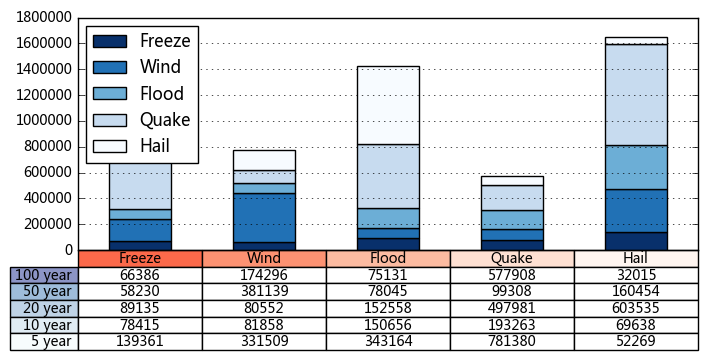

In [5]:
# 外嵌图表plt.table()
# table(cellText=None, cellColours=None,cellLoc='right', colWidths=None,rowLabels=None, rowColours=None, rowLoc='left',
# colLabels=None, colColours=None, colLoc='center',loc='bottom', bbox=None)

data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]
columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]
df = pd.DataFrame(data,columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail'),
                 index = ['%d year' % x for x in (100, 50, 20, 10, 5)])
print(df)

df.plot(kind='bar',grid = True,colormap='Blues_r',stacked=True,figsize=(8,3))
# 创建堆叠图

plt.table(cellText = data,
          cellLoc='center',
          cellColours = None,
          rowLabels = rows,
          rowColours = plt.cm.BuPu(np.linspace(0, 0.5,5))[::-1],  # BuPu可替换成其他colormap
          colLabels = columns,
          colColours = plt.cm.Reds(np.linspace(0, 0.5,5))[::-1], 
          rowLoc='right',
          loc='bottom')
# cellText：表格文本
# cellLoc：cell内文本对齐位置
# rowLabels：行标签
# colLabels：列标签
# rowLoc：行标签对齐位置
# loc：表格位置 → left，right，top，bottom

plt.xticks([])
# 不显示x轴标注

In [ ]:
'''
【课程3.8】  面积图、填图、饼图

plt.plot.area()
plt.fill(), plt.fill_between()
plt.pie()
 
'''

In [1]:
# 面积图

fig,axes = plt.subplots(2,1,figsize = (8,6))
df1 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(10, 4), columns=['a', 'b', 'c', 'd'])

df1.plot.area(colormap = 'Greens_r',alpha = 0.5,ax = axes[0])
df2.plot.area(stacked=False,colormap = 'Set2',alpha = 0.5,ax = axes[1])
# 使用Series.plot.area()和DataFrame.plot.area()创建面积图
# stacked：是否堆叠，默认情况下，区域图被堆叠
# 为了产生堆积面积图，每列必须是正值或全部负值！
# 当数据有NaN时候，自动填充0，所以图标签需要清洗掉缺失值

NameError: name 'plt' is not defined

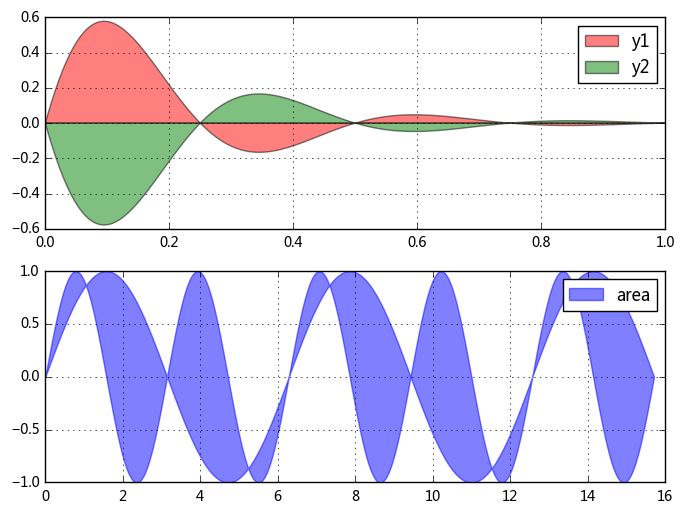

In [8]:
# 填图

fig,axes = plt.subplots(2,1,figsize = (8,6))

x = np.linspace(0, 1, 500)
y1 = np.sin(4 * np.pi * x) * np.exp(-5 * x)
y2 = -np.sin(4 * np.pi * x) * np.exp(-5 * x)
axes[0].fill(x, y1, 'r',alpha=0.5,label='y1')
axes[0].fill(x, y2, 'g',alpha=0.5,label='y2')
# 对函数与坐标轴之间的区域进行填充，使用fill函数
# 也可写成：plt.fill(x, y1, 'r',x, y2, 'g',alpha=0.5)

x = np.linspace(0, 5 * np.pi, 1000) 
y1 = np.sin(x)  
y2 = np.sin(2 * x)  
axes[1].fill_between(x, y1, y2, color ='b',alpha=0.5,label='area')  
# 填充两个函数之间的区域，使用fill_between函数

for i in range(2):
    axes[i].legend()
    axes[i].grid()
# 添加图例、格网

a    2.323435
b    1.671402
c    0.708510
d    1.995143
Name: series, dtype: float64


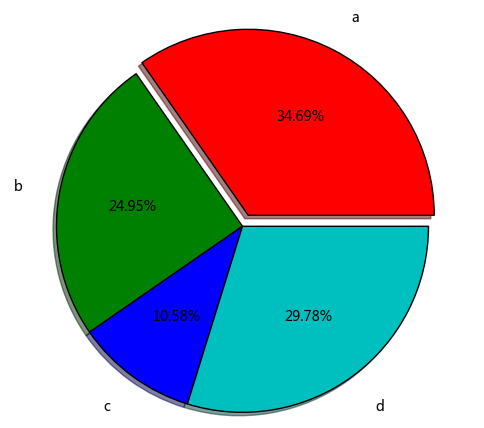

In [9]:
# 饼图 plt.pie()
# plt.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, 
# radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, hold=None, data=None)

s = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
plt.axis('equal')  # 保证长宽相等
plt.pie(s,
       explode = [0.1,0,0,0],
       labels = s.index,
       colors=['r', 'g', 'b', 'c'],
       autopct='%.2f%%',
       pctdistance=0.6,
       labeldistance = 1.2,
       shadow = True,
       startangle=0,
       radius=1.5,
       frame=False)
print(s)
# 第一个参数：数据
# explode：指定每部分的偏移量
# labels：标签
# colors：颜色
# autopct：饼图上的数据标签显示方式
# pctdistance：每个饼切片的中心和通过autopct生成的文本开始之间的比例
# labeldistance：被画饼标记的直径,默认值：1.1
# shadow：阴影
# startangle：开始角度
# radius：半径
# frame：图框
# counterclock：指定指针方向，顺时针或者逆时针

In [ ]:
'''
【课程3.9】  直方图

plt.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, 
histtype='bar', align='mid', orientation='vertical',rwidth=None, log=False, color=None, label=None, 
stacked=False, hold=None, data=None, **kwargs)
 
'''

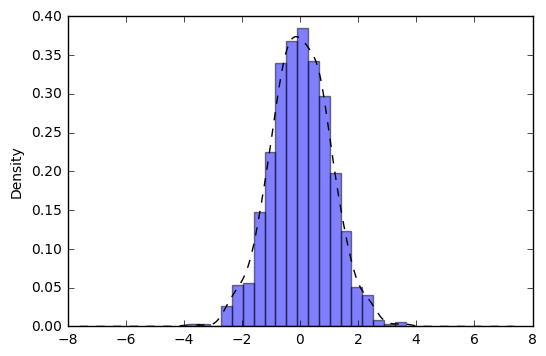

In [5]:
# 直方图+密度图

s = pd.Series(np.random.randn(1000))
s.hist(bins = 20,
       histtype = 'bar',
       align = 'mid',
       orientation = 'vertical',
       alpha=0.5,
       normed =True)
# bin：箱子的宽度
# normed 标准化
# histtype 风格，bar，barstacked，step，stepfilled
# orientation 水平还是垂直{‘horizontal’, ‘vertical’}
# align : {‘left’, ‘mid’, ‘right’}, optional(对齐方式)

s.plot(kind='kde',style='k--')
# 密度图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E3E70B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E434B70>]], dtype=object)

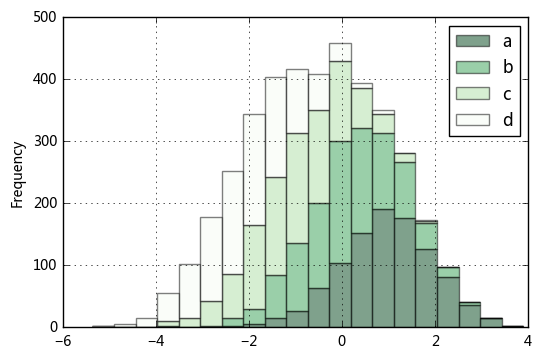

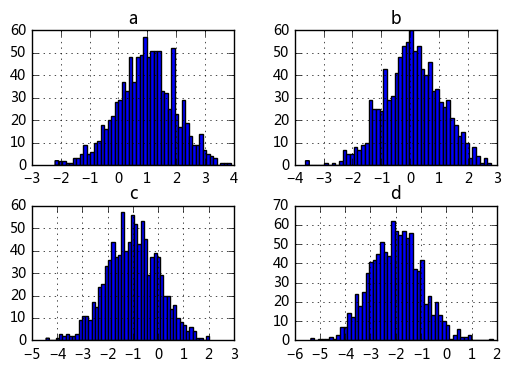

In [11]:
# 堆叠直方图

plt.figure(num=1)
df = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1, 'd': np.random.randn(1000)-2},
                   columns=['a', 'b', 'c','d'])
df.plot.hist(stacked=True,
             bins=20,
             colormap='Greens_r',
             alpha=0.5,
             grid=True)
# 使用DataFrame.plot.hist()和Series.plot.hist()方法绘制
# stacked：是否堆叠

df.hist(bins=50)
# 生成多个直方图

In [ ]:
'''
【课程3.10】  散点图、矩阵散点图

plt.scatter(), pd.scatter_matrix()
 
'''

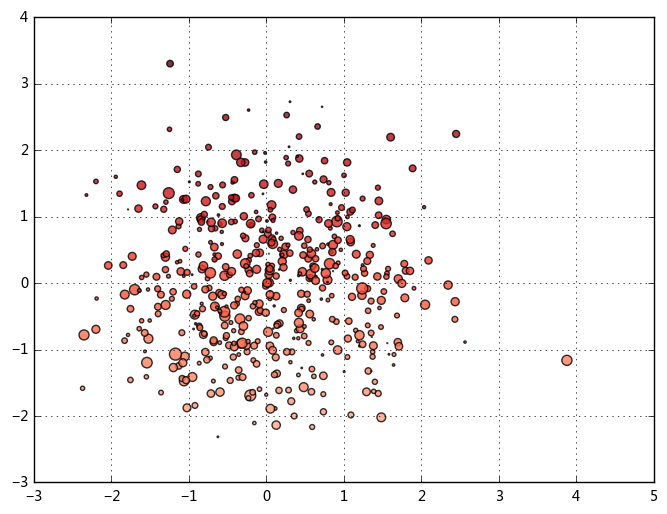

In [12]:
# plt.scatter()散点图
# plt.scatter(x, y, s=20, c=None, marker='o', cmap=None, norm=None, vmin=None, vmax=None, 
# alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)

plt.figure(figsize=(8,6))
x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x,y,marker='.',
           s = np.random.randn(1000)*100,
           cmap = 'Reds',
           c = y,
           alpha = 0.8,)
plt.grid()
# s：散点的大小
# c：散点的颜色
# vmin,vmax：亮度设置，标量
# cmap：colormap

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E55AB38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EA51F98>]], dtype=object)

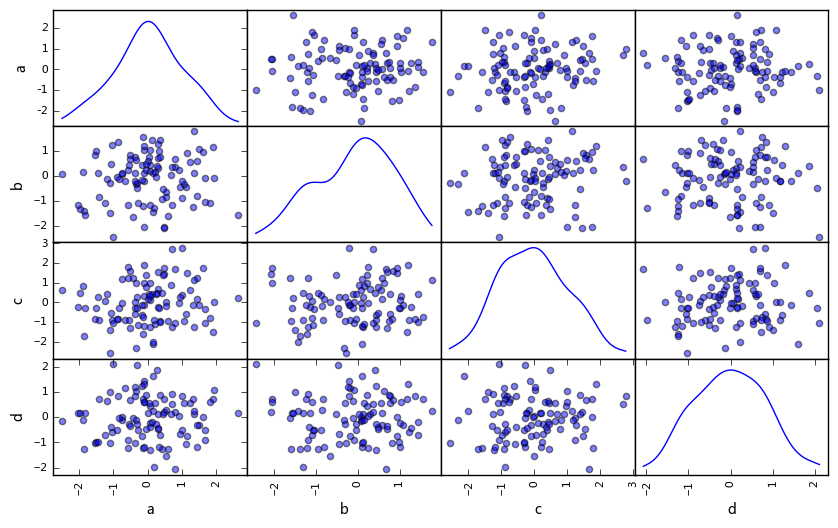

In [13]:
# pd.scatter_matrix()散点矩阵
# pd.scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, 
# grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwds)

df = pd.DataFrame(np.random.randn(100,4),columns = ['a','b','c','d'])
pd.scatter_matrix(df,figsize=(10,6),
                 marker = 'o',
                 diagonal='kde',
                 alpha = 0.5,
                 range_padding=0.1)
# diagonal：({‘hist’, ‘kde’})，必须且只能在{‘hist’, ‘kde’}中选择1个 → 每个指标的频率图
# range_padding：(float, 可选)，图像在x轴、y轴原点附近的留白(padding)，该值越大，留白距离越大，图像远离坐标原点

In [ ]:
'''
【课程3.11】  极坐标图

调用subplot()创建子图时通过设置projection='polar',便可创建一个极坐标子图，然后调用plot()在极坐标子图中绘图
 
'''

0    0
1    1
2    2
3    3
4    4
dtype: int32
[ 0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18]


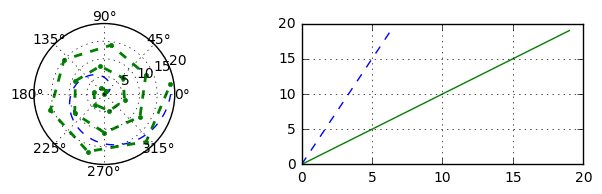

In [6]:
# 创建极坐标轴

s = pd.Series(np.arange(20))
theta=np.arange(0,2*np.pi,0.02)
print(s.head())
print(theta[:10])
# 创建数据

fig = plt.figure(figsize=(8,4))
ax1 = plt.subplot(121, projection = 'polar')
ax2 = plt.subplot(122)
# 创建极坐标子图
# 还可以写：ax = fig.add_subplot(111,polar=True)

ax1.plot(theta,theta*3,linestyle = '--',lw=1)  
ax1.plot(s, linestyle = '--', marker = '.',lw=2)
ax2.plot(theta,theta*3,linestyle = '--',lw=1)
ax2.plot(s)
plt.grid()
# 创建极坐标图，参数1为角度（弧度制），参数2为value
# lw → 线宽

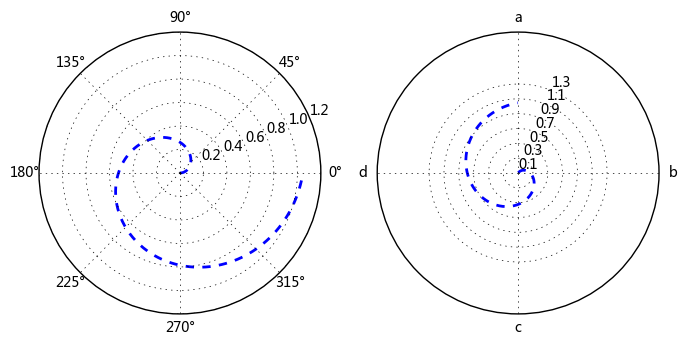

In [15]:
# 极坐标参数设置

theta=np.arange(0,2*np.pi,0.02)
plt.figure(figsize=(8,4))
ax1= plt.subplot(121, projection='polar')
ax2= plt.subplot(122, projection='polar')
ax1.plot(theta,theta/6,'--',lw=2)
ax2.plot(theta,theta/6,'--',lw=2)
# 创建极坐标子图ax

ax2.set_theta_direction(-1)
# set_theta_direction()：坐标轴正方向，默认逆时针

ax2.set_thetagrids(np.arange(0.0, 360.0, 90),['a','b','c','d'])
ax2.set_rgrids(np.arange(0.2,2,0.4))
# set_thetagrids()：设置极坐标角度网格线显示及标签 → 网格和标签数量一致
# set_rgrids()：设置极径网格线显示，其中参数必须是正数

ax2.set_theta_offset(np.pi/2)
# set_theta_offset()：设置角度偏移，逆时针，弧度制

ax2.set_rlim(0.2,1.2)
ax2.set_rmax(2)
ax2.set_rticks(np.arange(0.1, 1.5, 0.2))
# set_rlim()：设置显示的极径范围
# set_rmax()：设置显示的极径最大值
# set_rticks()：设置极径网格线的显示范围

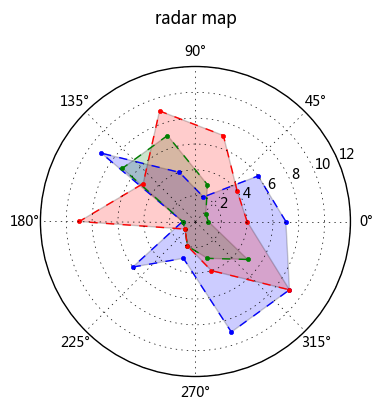

In [16]:
# 雷达图1 - 极坐标的折线图/填图 - plt.plot()

plt.figure(figsize=(8,4))

ax1= plt.subplot(111, projection='polar')
ax1.set_title('radar map\n')  # 创建标题
ax1.set_rlim(0,12)

data1 = np.random.randint(1,10,10)
data2 = np.random.randint(1,10,10)
data3 = np.random.randint(1,10,10)
theta=np.arange(0,2*np.pi,2*np.pi/10)
# 创建数据

ax1.plot(theta,data1,'.--',label='data1')
ax1.fill(theta,data1,alpha=0.2)
ax1.plot(theta,data2,'.--',label='data2')
ax1.fill(theta,data2,alpha=0.2)
ax1.plot(theta,data3,'.--',label='data3')
ax1.fill(theta,data3,alpha=0.2)
# 绘制雷达线

(0, 10)

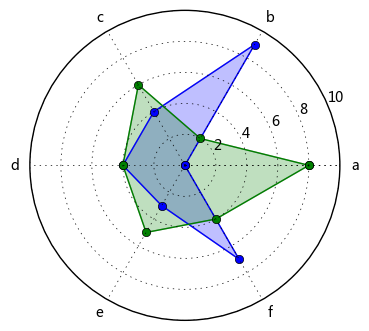

In [17]:
# 雷达图2 - 极坐标的折线图/填图 - plt.polar()
# 首尾闭合

labels = np.array(['a','b','c','d','e','f']) # 标签
dataLenth = 6 # 数据长度
data1 = np.random.randint(0,10,6) 
data2 = np.random.randint(0,10,6) # 数据

angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False) # 分割圆周长
data1 = np.concatenate((data1, [data1[0]])) # 闭合
data2 = np.concatenate((data2, [data2[0]])) # 闭合
angles = np.concatenate((angles, [angles[0]])) # 闭合

plt.polar(angles, data1, 'o-', linewidth=1) #做极坐标系
plt.fill(angles, data1, alpha=0.25)# 填充
plt.polar(angles, data2, 'o-', linewidth=1) #做极坐标系
plt.fill(angles, data2, alpha=0.25)# 填充

plt.thetagrids(angles * 180/np.pi, labels) # 设置网格、标签
plt.ylim(0,10)  # polar的极值设置为ylim

(<a list of 8 Line2D thetagridline objects>,
 <a list of 4 Text thetagridlabel objects>)

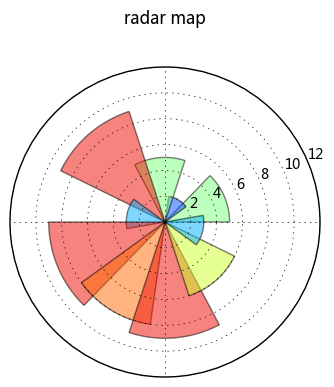

In [18]:
# 极轴图 - 极坐标的柱状图

plt.figure(figsize=(8,4))

ax1= plt.subplot(111, projection='polar')
ax1.set_title('radar map\n')  # 创建标题
ax1.set_rlim(0,12)

data = np.random.randint(1,10,10)
theta=np.arange(0,2*np.pi,2*np.pi/10)
# 创建数据

bar = ax1.bar(theta,data,alpha=0.5)
for r,bar in zip(data, bar):
    bar.set_facecolor(plt.cm.jet(r/10.))  # 设置颜色
plt.thetagrids(np.arange(0.0, 360.0, 90), []) # 设置网格、标签（这里是空标签，则不显示内容）

In [ ]:
'''
【课程3.12】  箱型图

箱型图：又称为盒须图、盒式图、盒状图或箱线图，是一种用作显示一组数据分散情况资料的统计图
包含一组数据的：最大值、最小值、中位数、上四分位数（Q1）、下四分位数（Q3）、异常值
① 中位数 → 一组数据平均分成两份，中间的数
② 下四分位数Q1 → 是将序列平均分成四份，计算(n+1)/4与(n-1)/4两种，一般使用(n+1)/4
③ 上四分位数Q3 → 是将序列平均分成四份，计算(1+n)/4*3=6.75
④ 内限 → T形的盒须就是内限，最大值区间Q3+1.5IQR,最小值区间Q1-1.5IQR （IQR=Q3-Q1）
⑤ 外限 → T形的盒须就是内限，最大值区间Q3+3IQR,最小值区间Q1-3IQR （IQR=Q3-Q1）
⑥ 异常值 → 内限之外 - 中度异常，外限之外 - 极度异常

plt.plot.box(),plt.boxplot()
 
'''

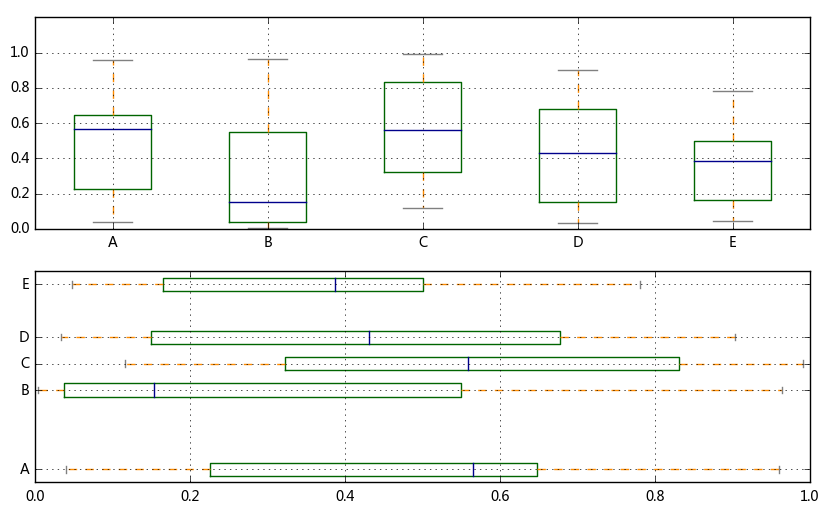

In [19]:
# plt.plot.box()绘制

fig,axes = plt.subplots(2,1,figsize=(10,6))
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
# 箱型图着色
# boxes → 箱线
# whiskers → 分位数与error bar横线之间竖线的颜色
# medians → 中位数线颜色
# caps → error bar横线颜色

df.plot.box(ylim=[0,1.2],
           grid = True,
           color = color,
           ax = axes[0])
# color：样式填充

df.plot.box(vert=False, 
            positions=[1, 4, 5, 6, 8],
            ax = axes[1],
            grid = True,
           color = color)
# vert：是否垂直，默认True
# position：箱型图占位

{'caps': [<matplotlib.lines.Line2D object at 0x0000000010042CF8>, <matplotlib.lines.Line2D object at 0x0000000010047BE0>, <matplotlib.lines.Line2D object at 0x0000000010057C88>, <matplotlib.lines.Line2D object at 0x000000001005DB70>, <matplotlib.lines.Line2D object at 0x000000001006EC18>, <matplotlib.lines.Line2D object at 0x0000000010074B00>, <matplotlib.lines.Line2D object at 0x0000000010085BA8>, <matplotlib.lines.Line2D object at 0x000000001008BA90>, <matplotlib.lines.Line2D object at 0x00000000104896D8>, <matplotlib.lines.Line2D object at 0x00000000104998D0>], 'whiskers': [<matplotlib.lines.Line2D object at 0x0000000010042198>, <matplotlib.lines.Line2D object at 0x0000000010042B70>, <matplotlib.lines.Line2D object at 0x0000000010057208>, <matplotlib.lines.Line2D object at 0x0000000010057B00>, <matplotlib.lines.Line2D object at 0x000000001006E198>, <matplotlib.lines.Line2D object at 0x000000001006EA90>, <matplotlib.lines.Line2D object at 0x0000000010085128>, <matplotlib.lines.Line2D

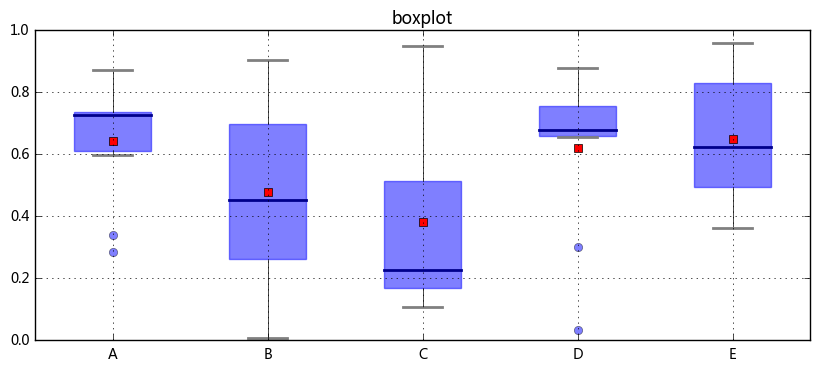

In [20]:
# plt.boxplot()绘制
# pltboxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, 
# usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, 
# labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, 
# zorder=None, hold=None, data=None)

df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
plt.figure(figsize=(10,4))
# 创建图表、数据

f = df.boxplot(sym = 'o',  # 异常点形状，参考marker
               vert = True,  # 是否垂直
               whis = 1.5,  # IQR，默认1.5，也可以设置区间比如[5,95]，代表强制上下边缘为数据95%和5%位置
               patch_artist = True,  # 上下四分位框内是否填充，True为填充
               meanline = False,showmeans=True,  # 是否有均值线及其形状
               showbox = True,  # 是否显示箱线
               showcaps = True,  # 是否显示边缘线
               showfliers = True,  # 是否显示异常值
               notch = False,  # 中间箱体是否缺口
               return_type='dict'  # 返回类型为字典
              ) 
plt.title('boxplot')
print(f)

for box in f['boxes']:
    box.set( color='b', linewidth=1)        # 箱体边框颜色
    box.set( facecolor = 'b' ,alpha=0.5)    # 箱体内部填充颜色
for whisker in f['whiskers']:
    whisker.set(color='k', linewidth=0.5,linestyle='-')
for cap in f['caps']:
    cap.set(color='gray', linewidth=2)
for median in f['medians']:
    median.set(color='DarkBlue', linewidth=2)
for flier in f['fliers']:
    flier.set(marker='o', color='y', alpha=0.5)
# boxes, 箱线
# medians, 中位值的横线,
# whiskers, 从box到error bar之间的竖线.
# fliers, 异常值
# caps, error bar横线
# means, 均值的横线,

       Col1      Col2  X  Y
0  0.884439  0.801121  A  A
1  0.802741  0.390957  A  B
2  0.139452  0.805676  A  A
3  0.030047  0.571676  A  B
4  0.654272  0.733307  A  A


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010176588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000101BFB00>], dtype=object)

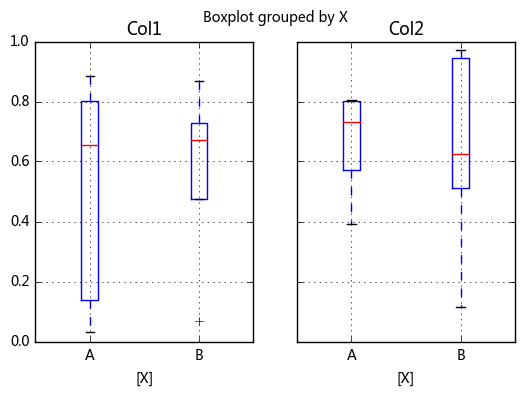

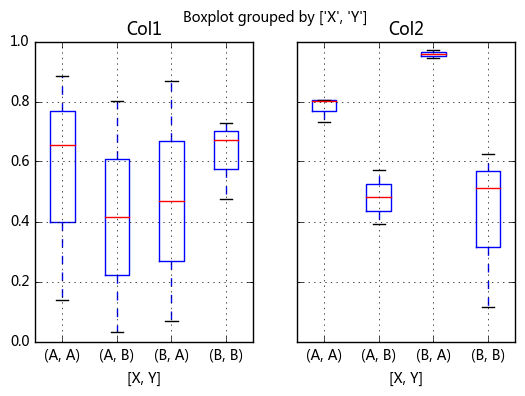

In [21]:
# plt.boxplot()绘制
# 分组汇总

df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])
print(df.head())
df.boxplot(by = 'X')
df.boxplot(column=['Col1','Col2'], by=['X','Y'])
# columns：按照数据的列分子图
# by：按照列分组做箱型图